### Question 1)
Read the given dataset as a dataframe and check for missing values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import math

In [2]:
jewel = pd.read_csv("jewel.csv")
print(jewel.index)
print(jewel.columns.values)
jewel.head()
print(pd.isnull(jewel).any(axis=0))
print(pd.isna(jewel).any(axis=0))
# We can understand that there are no missing or null values in dataset since all columns return false for null values.

RangeIndex(start=0, stop=53940, step=1)
['carat' 'cut' 'color' 'clarity' 'depth' 'table' 'price' 'x' 'y' 'z']
carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool
carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool


### Question 2)
Create line plots for 'y', 'z', 'depth', and 'table' attributes versus price separately in order to check for potential outliers.

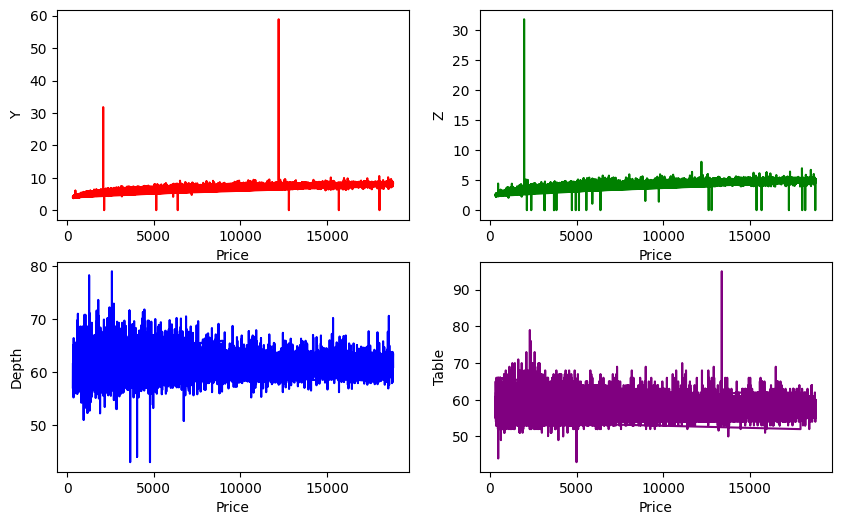

In [3]:
y = jewel["y"]
z = jewel["z"]
depth = jewel["depth"]
table = jewel["table"]
price = jewel["price"]

fig=plt.figure()

fig.set_size_inches(10,6)

plt.subplot(221)
plt.plot(price,y,color="red")
plt.xlabel("Price")
plt.ylabel("Y")

plt.subplot(222)

plt.plot(price,z,color="green")
plt.xlabel("Price")
plt.ylabel("Z")

plt.subplot(223)
plt.plot(price,depth,color = "blue")
plt.xlabel("Price")
plt.ylabel("Depth")

plt.subplot(224)
plt.plot(price,table,color = "purple")
plt.xlabel("Price")
plt.ylabel("Table")
plt.show()




### Question 3)

Find and remove outliers by analyzing the above output of question 2. Explain your outlier detection process.

<AxesSubplot: >

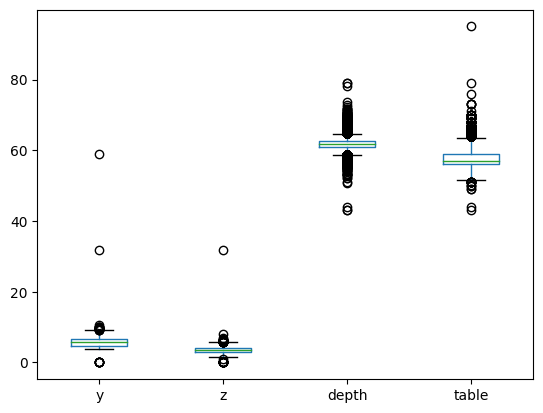

In [4]:
jewel.boxplot(["y","z","depth","table"],grid=False)
# Potential outlier points are marked in boxplot.

# For y varible: y > 20 values can be considered as outliers.
# For z variable: z > 20 values can be considered as outliers.
# For depth variable: depth < 50 and depth > 75 values can be consiedered as outliers.
# For table variable: table < 45 and table > 75 values can be considered as outliers.

In [5]:
# OUTLIER DELETION


outlier_y = jewel[jewel["y"] > 20].index
jewel.drop(outlier_y,axis=0,inplace=True)

outlier_z = jewel[jewel["z"] > 20].index
jewel.drop(outlier_z,axis=0,inplace=True)

outlier_depth = jewel[(jewel["depth"] > 75) | (jewel["depth"] < 50)].index
jewel.drop(outlier_depth,axis=0,inplace=True)


outlier_table = jewel[(jewel["table"] > 75 ) | (jewel["table"] < 45)].index
jewel.drop(outlier_table,axis=0,inplace=True)





(40.0, 100.0)

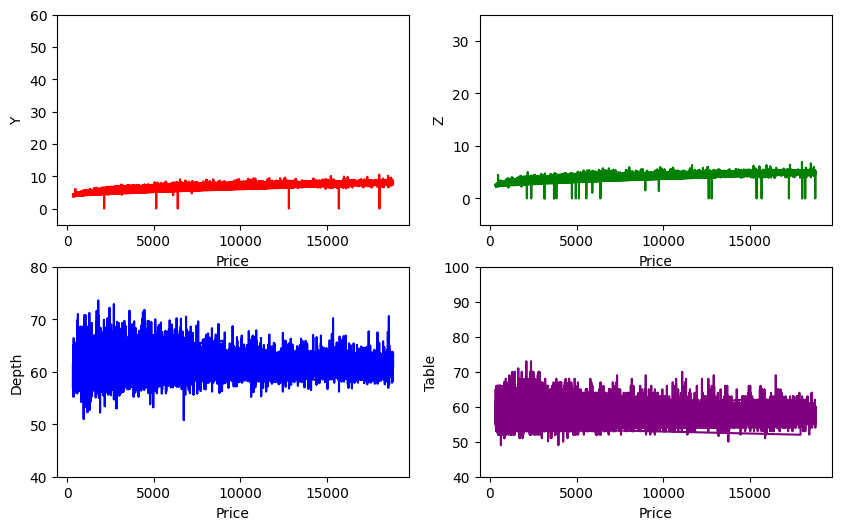

In [6]:
# Same Graph after outlier deletion

fig=plt.figure()
y = jewel["y"]
z = jewel["z"]
depth = jewel["depth"]
table = jewel["table"]
price = jewel["price"]

fig.set_size_inches(10,6)

plt.subplot(221)
plt.plot(price,y,color="red")
plt.xlabel("Price")
plt.ylabel("Y")
plt.ylim(-5,60)

plt.subplot(222)

plt.plot(price,z,color="green")
plt.xlabel("Price")
plt.ylabel("Z")
plt.ylim(-5,35)

plt.subplot(223)
plt.plot(price,depth,color = "blue")
plt.xlabel("Price")
plt.ylabel("Depth")
plt.ylim(40,80)

plt.subplot(224)
plt.plot(price,table,color = "purple")
plt.xlabel("Price")
plt.ylabel("Table")
plt.ylim(40,100)




### Question 4)
Replace ordinal values (cut, color, clarity) according to rules below:
- For "cut": 'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4, 'Premium':5
- For "color": 'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7
- For "clarity": 'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8

In [7]:

jewel["cut"].replace(["Good","Very Good","Fair","Ideal","Premium"],[1,2,3,4,5],inplace=True)
jewel["color"].replace(["J","I","H","G","F","E","D"],[1,2,3,4,5,6,7],inplace=True)
jewel["clarity"].replace(["I1","SI1","SI2","VS1","VS2","VVS1","VVS2","IF"],[1,2,3,4,5,6,7,8],inplace=True)
jewel

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,6,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,6,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,6,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,2,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,1,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,7,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,7,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,7,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,5,3,3,61.0,58.0,2757,6.15,6.12,3.74


### Question 5)
Create bar graphs for 'cut', 'color', and 'clarity' attributes with their new values to analyze the dataset visually.


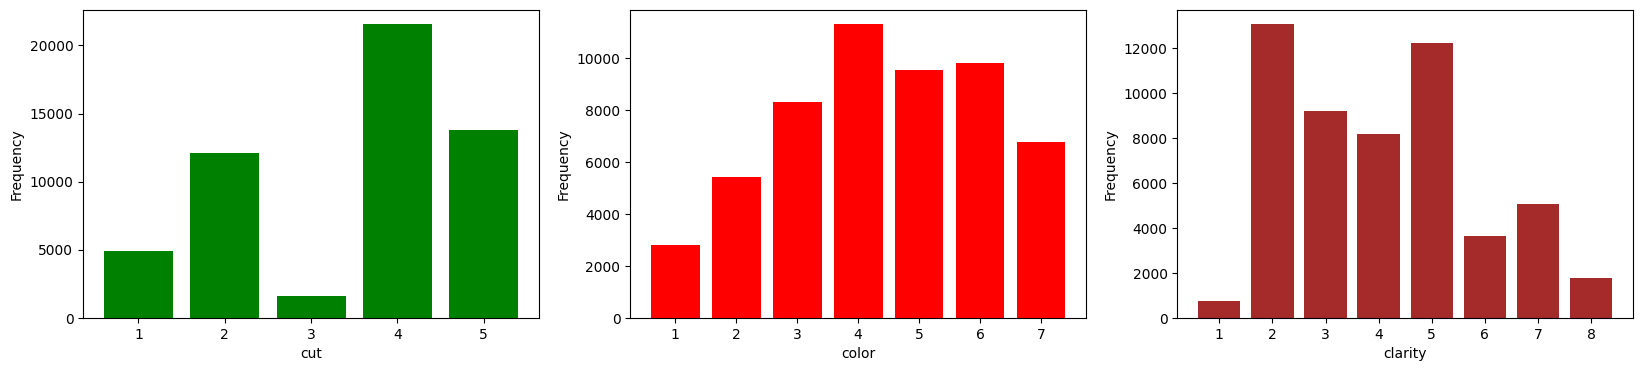

In [8]:
# To match category and it's frequency, I sorted both category values and frequencies.

cut=jewel ["cut"].unique()
cut.sort()
freq_Cut = jewel["cut"].value_counts().sort_index(ascending=True).values


color = jewel["color"].unique()
color.sort()
freq_Color = jewel["color"].value_counts().sort_index(ascending=True).values


clarity = jewel["clarity"].unique()
clarity.sort()
freq_Clarity = jewel["clarity"].value_counts().sort_index(ascending=True).values

fig = plt.figure()

fig.set_size_inches(20,4)
plt.subplot(131)
plt.bar(cut,freq_Cut,color="green")
plt.xlabel("cut")
plt.ylabel("Frequency")


plt.subplot(132)
plt.bar(color,freq_Color,color="red")
plt.xlabel("color")
plt.ylabel("Frequency")
plt.xticks(color)


plt.subplot(133)
plt.bar(clarity,freq_Clarity,color="brown")
plt.xlabel("clarity")
plt.ylabel("Frequency")
plt.xticks(clarity)
plt.show()



### Question 6)
Shuffle the data points and split the dataset into training and testing set, with a 0.7-0.3 ratio (training set will be %70, and test set will be %30 of the dataset) (Write your own shuffling and spliting code here, do not use predefined function train_test_split).



In [9]:
def shuffle(dataframe):
    # Function puts all values in dataframe to list. Then random index is selected (between 0 and len(list)), after that element in that index is popped and added to the end of the list. 

    values = dataframe.values
    values = values.tolist()
    for i in range(len(values)):
        x = random.randint(0,len(values)-1)
        val = values.pop(x)
        values.append(val)

    return values

def split(shuffledList,percent):
    size = len(shuffledList)
    train_size = (size * percent /100)
    
    list_copy = shuffledList.copy() # To protect shuffled order in original list
    train_x = []
    train_y = []
    test_x = []
    test_y = []

    for i in range(int(train_size)):
        x = random.randint(0,len(list_copy)-1) # random index point is selected.
        val = list_copy.pop(x) # data in index x is stored as val. 
        price = val.pop(6) # Price is in 6.th index so I have to delete it from data value.

        train_x.append(val)   # val contains all values except price so we can add it to train_x list.
        train_y.append(price) # Dependent variable price is added to the train_y list.


    for i in range(len(list_copy)):  # we pop (percent) amount of data from all values. So I can put all remain values on test_x and test_y lists. Same process happens here.
        val = list_copy[i]
        price = val.pop(6)

        test_x.append(val)
        test_y.append(price)
        
    # Then I transformed all lists to numpy arrays and returned.
    train_x = np.asarray(train_x)
    train_y = np.asarray(train_y)
    test_x = np.asarray(test_x)
    test_y = np.asarray(test_y)
    return train_x,train_y,test_x,test_y


list = shuffle(jewel)
train_x,train_y,test_x,test_y = split(list,70)


### Question 7)

Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Then, make prediction and calculate mean squared error (MSE). Calculate MSE for k value between 1-30 and print them. Finally, create elbow function to find best k value and plot the elbow curve. Explain how you find the best k-value.

Error for k = 1:  1142072.8227840278
Error for k = 2:  913325.1449653851
Error for k = 3:  851200.4918064312
Error for k = 4:  824565.5322699036
Error for k = 5:  812337.6663370009
Error for k = 6:  831786.2831606022
Error for k = 7:  838022.8197312552
Error for k = 8:  845529.3470163958
Error for k = 9:  848457.7193658818
Error for k = 10:  846649.8018432439
Error for k = 11:  854643.9521066769
Error for k = 12:  863490.2856828889
Error for k = 13:  870327.2173288878
Error for k = 14:  875148.7436270217
Error for k = 15:  883428.2353366024
Error for k = 16:  890441.039491806
Error for k = 17:  896053.895067247
Error for k = 18:  902887.883565969
Error for k = 19:  910113.3638909445
Error for k = 20:  918228.3822236989
Error for k = 21:  925268.2362184419
Error for k = 22:  931290.1496088454
Error for k = 23:  939621.2219393604
Error for k = 24:  945473.7915361739
Error for k = 25:  953478.3681459761
Error for k = 26:  958931.5521140185
Error for k = 27:  963240.0877168794
Error for k 

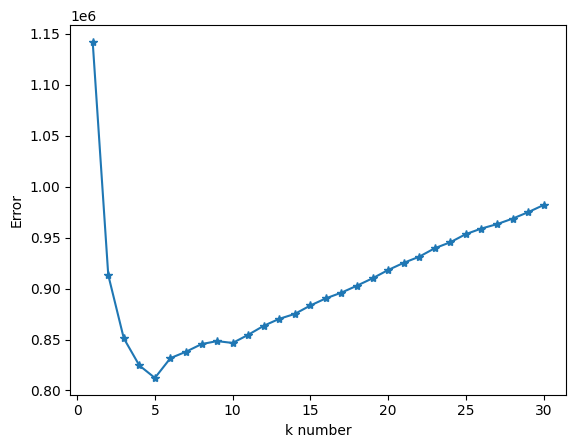

Best k number which gives the lowest error is:  5


In [10]:

error_dict = {} # keys - k number , value - error

for i in range(1,31,1):
    model = neighbors.KNeighborsRegressor(n_neighbors= i)
    model.fit(train_x,train_y)

    prediction = model.predict(test_x)
    err = mean_squared_error(test_y,prediction)
    error_dict[i] = err

    print(f"Error for k = {i}: ", err )


# Best k value for model should give the lowest error.

def elbow(error_dict):
    # To find minimum error value, error_dict is traversed.
    k = 1
    min = error_dict[1]
    for i in range(1,len(error_dict)+1):
        
        if error_dict[i] < min:
            min = error_dict[i]
            k = i

    return k 


plt.plot(error_dict.keys(),error_dict.values(),marker="*")
plt.xlabel("k number")
plt.ylabel("Error")
plt.show()



k = elbow(error_dict)
print("Best k number which gives the lowest error is: ",k)




### Question 8)

Run 10-Fold Cross validation (CV) and print accuracy values for each run of CV. Also print the final average accuracy of the model.

In [11]:

model = neighbors.KNeighborsRegressor(n_neighbors= k)  # New model is created with optimal k
score =cross_val_score(model,train_x,train_y,cv=10)
j = 1
for i in score:
    print(f"Score of {j}. iteration: ",-i)
    j+=1

print("*******************")
print("Average of scores: " , np.mean(score))
    

Score of 1. iteration:  0.9458437997000062
Score of 2. iteration:  0.9506918206264731
Score of 3. iteration:  0.9438927852091886
Score of 4. iteration:  0.9385905639531864
Score of 5. iteration:  0.9518969723516798
Score of 6. iteration:  0.9429156493909876
Score of 7. iteration:  0.9438327997595023
Score of 8. iteration:  0.947468165852142
Score of 9. iteration:  0.9464727426975486
Score of 10. iteration:  0.939292027699145
*******************
Average of scores:  0.9450897327239858


### Question 9)

Predict the price of new jewel data with the following custom features. 

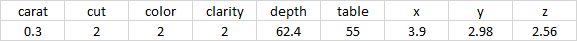

In [12]:
features = np.array([[0.3,2,2,2,62.4,55,3.9,2.98,2.56]]) 
features.reshape(1,-1) # To fit 1D array to the model, I must reshape it.
model = neighbors.KNeighborsRegressor(k) 
model.fit(train_x,train_y)
pred = model.predict(features)

print("Predicted price: {:.2f}".format(float(pred)))

Predicted price: 488.40
